In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df= pd.read_csv("Titanic.csv")

# **Steps for Data Analysis and Data Wrangling**

1. See Data Table (*df.head*)
2. Rename Columns to something readable
3. Manually *drop* unnecessary columns
4. *data.info()* Change Incorrect datatypes
5. Check & replace Null values with Mean, Median ( Int),  Mode (string)
6. Remove Duplicate datapoints (rows)
7. Replace strings with numbers
8. Co-relation Heatmap, remove column if >0.9 (maybe?)
9. Remove outliers. (Boxplot)
10. *df.describe()*

After Testing, Run Confusion Matrix

In [3]:
#1.See Data Table
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# 2. Rename the columns to something more readable

df.columns = ['Passenger_ID', 'Survived', 'P_Class', 'Name', 'Sex', 'Age', 'Siblings/Spouse','Parents/Child','Ticket No.','Fare','Cabin No.','Embarked Port']
 
df

,Passenger_ID,Survived,P_Class,Name,Sex,Age,Siblings/Spouse,Parents/Child,Ticket No.,Fare,Cabin No.,Embarked Port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#3. Manually drop unnecessary columns
#Dropping "Name" & "Ticket No" columns as they are not necessary to predict "Survived".

df.drop('Name', axis=1, inplace=True) #inplace= True OR  df=df.drop
df.drop('Ticket No.', axis=1, inplace=True)

df

,Passenger_ID,Survived,P_Class,Sex,Age,Siblings/Spouse,Parents/Child,Fare,Cabin No.,Embarked Port
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [6]:
df.info() #4. To check if correct datatypes are given

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passenger_ID     891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   P_Class          891 non-null    int64  
 3   Sex              891 non-null    object 
 4   Age              714 non-null    float64
 5   Siblings/Spouse  891 non-null    int64  
 6   Parents/Child    891 non-null    int64  
 7   Fare             891 non-null    float64
 8   Cabin No.        204 non-null    object 
 9   Embarked Port    889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [7]:
#5. To check null values in each column
df.isnull().sum()

Passenger_ID         0
Survived             0
P_Class              0
Sex                  0
Age                177
Siblings/Spouse      0
Parents/Child        0
Fare                 0
Cabin No.          687
Embarked Port        2
dtype: int64

<Axes: >

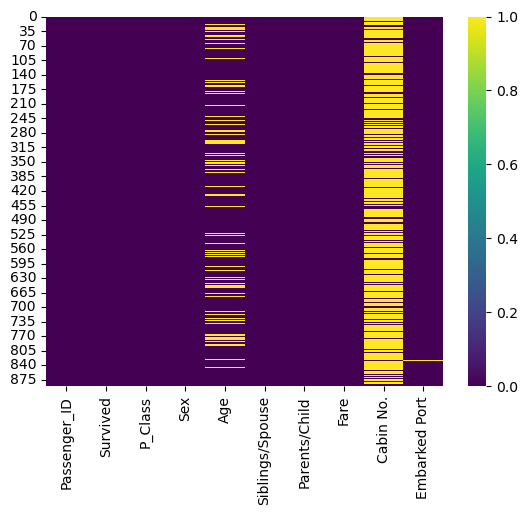

In [8]:
sns.heatmap (df.isnull(), cmap="viridis") #viridis colour pallete

In [9]:
df.drop('Cabin No.',axis=1,inplace=True) # Dropping Cabin No. as majority values are Null and it is not related to Survived Status

#Decision Tree is usually robust to NaN ???

#Replace Null values in Age & Embarked column with Median & Mode respectively
df['Age'] = df['Age'].fillna(df['Age'].median())


In [10]:
df['Embarked Port'] = df['Embarked Port'].fillna(df['Embarked Port'].mode()[0])

In [11]:
df.isnull().sum()

Passenger_ID       0
Survived           0
P_Class            0
Sex                0
Age                0
Siblings/Spouse    0
Parents/Child      0
Fare               0
Embarked Port      0
dtype: int64

In [12]:
#6.Finding the number of Duplicated Datapoints(rows)
df.duplicated().sum()

0

In [13]:
df

,Passenger_ID,Survived,P_Class,Sex,Age,Siblings/Spouse,Parents/Child,Fare,Embarked Port
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [14]:
#7. Replacing String with Binary values "Sex","Embarked" rows

df['Sex'] = df['Sex'].replace({'male':0, 'female':'1'})
df['Embarked Port'] = df['Embarked Port'].replace({'C': "Cherbourg", 'Q':"Queenstown", 'S': "Southampton"})
df=pd.get_dummies(df,columns=['Embarked Port']) #We could use Label Encoder as well
#We can do the same with P_Class also

df

,Passenger_ID,Survived,P_Class,Sex,Age,Siblings/Spouse,Parents/Child,Fare,Embarked Port_Cherbourg,Embarked Port_Queenstown,Embarked Port_Southampton
0,1,0,3,0,22.0,1,0,7.2500,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,True,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,False,False,True
887,888,1,1,1,19.0,0,0,30.0000,False,False,True
888,889,0,3,1,28.0,1,2,23.4500,False,False,True
889,890,1,1,0,26.0,0,0,30.0000,True,False,False


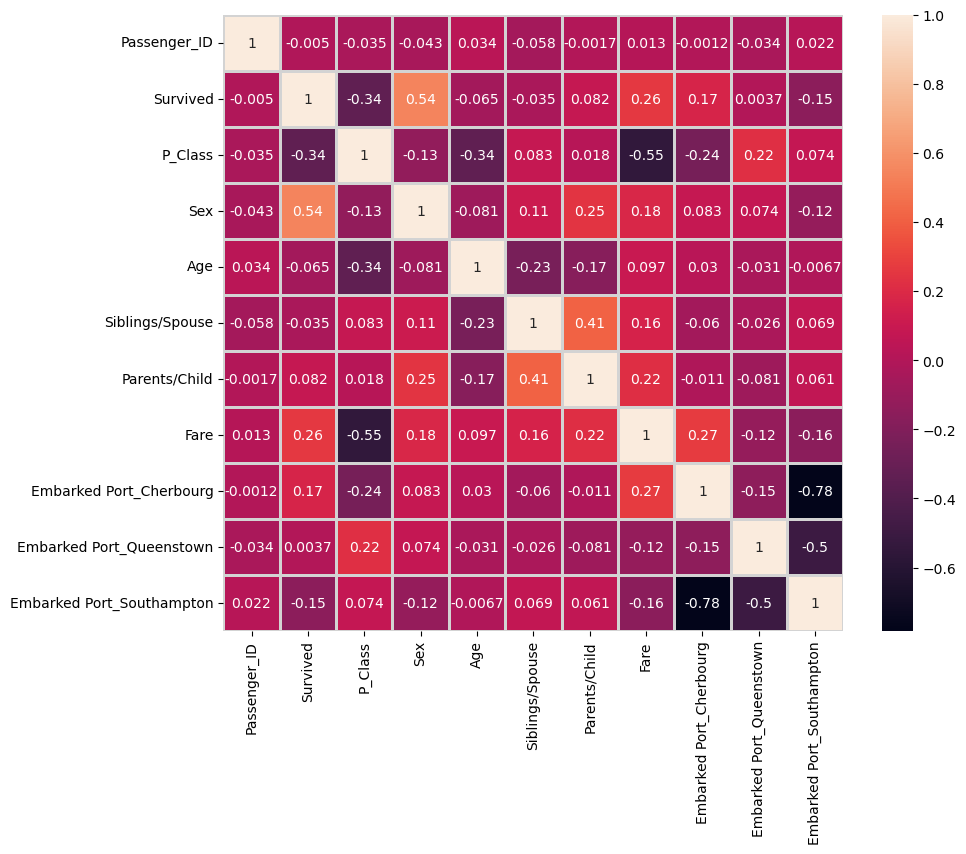

In [15]:
#8. Co-relation Heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

<Axes: >

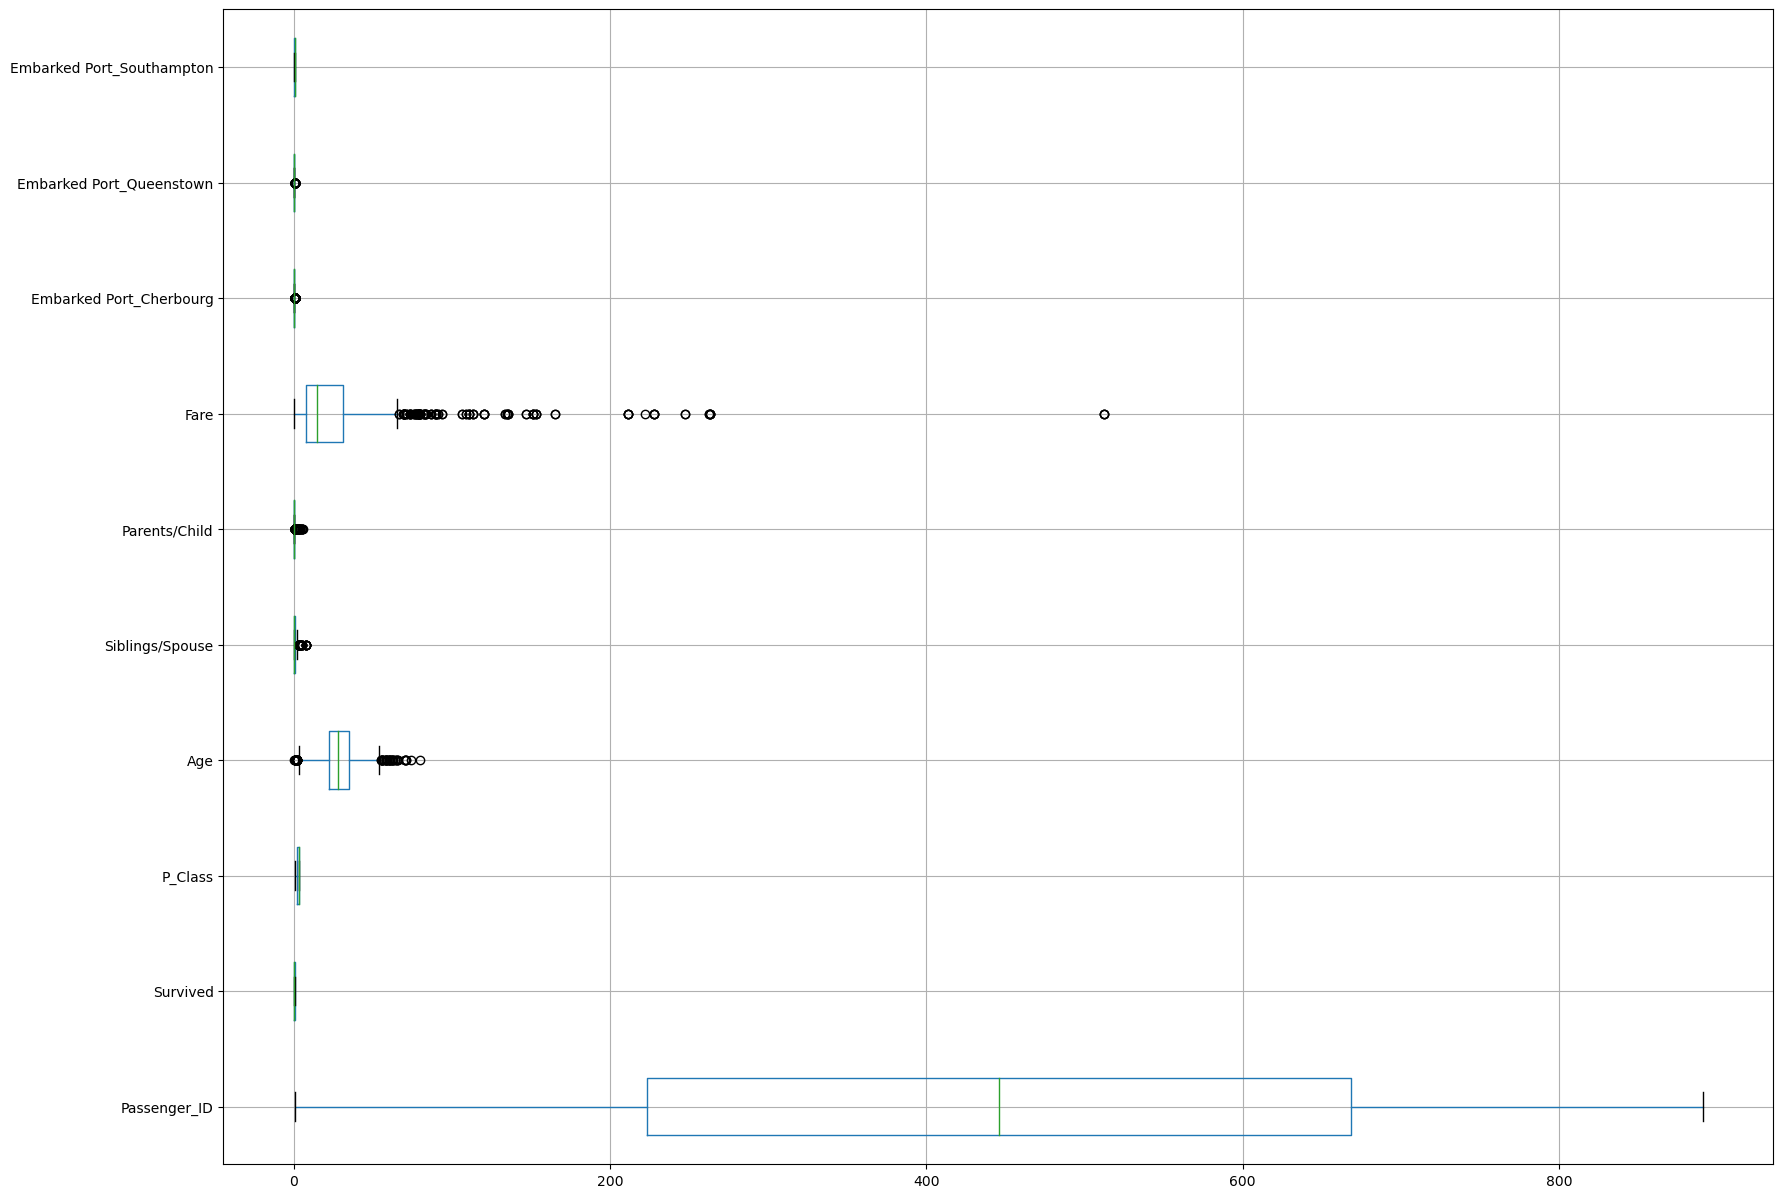

In [16]:
#9. View & Remove Outliers using Boxplot
plt.figure(figsize=(20,15))
df.boxplot(vert=0)

#More to be done here, although Decision Tree is good at handling outliers

In [17]:
df.describe()

,Passenger_ID,Survived,P_Class,Age,Siblings/Spouse,Parents/Child,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Data Splitting into Train & Test Set**

In [18]:
# Split the dataset into input and output

ind_col = [col for col in df.columns if col != 'Survived']
dep_col = 'Survived'

x = df[ind_col]
y = df[dep_col]
x.shape, y.shape

((891, 10), (891,))

In [19]:
# Using sklearn.model_selection.train_test_split to split the data into train and test sets
# Use 20% of the data for the test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 6)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

# **Running the Decision Tree Model**

In [20]:
criterion = 'entropy'
splitter = 'best'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1

Treeclf = tree.DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

Treeclf = Treeclf.fit(x_train, y_train)

y_pred = Treeclf.predict(x_test)

print("Accuracy is {}\n".format(accuracy_score(y_test, y_pred)*100))
print("Classification Report is:\n {}".format(classification_report(y_test, y_pred)))

Accuracy is 78.2122905027933

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       113
           1       0.70      0.71      0.71        66

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

